# Graded Challenge 1

Ini merupakan _Graded Challenge (Phase 0 Week 1)_ dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep dasar Python, Numpy, serta Data Preparation with Pandas.

_Graded challenge_ ini dibuat oleh **Risqi Rahmatullah (Batch 007)**.

## I. Deskripsi

### Deskripsi Data
Data ini terdiri dari 721 Pokemon, termasuk nomor ID, nama, tipe pertama, tipe kedua, status dasar: _HP_, _Attack_, _Defense_, _Special Attack_, _Special Defense_, dan _Speed_.

Data ini terdiri dari beberapa kolom yaitu:

- '#' merujuk pada ID setiap pokemon atau nomor pokemon.
- 'Name' merujuk pada nama setiap pokemon.
- 'Type 1' merujuk pada tipe setiap pokemon, ini menentukan kelemahan/kekebalan terhadap serangan dari tipe lawan.
- 'Type 2' merujuk pada tipe kedua pokemon. Beberapa pokemon ada yang memiliki dua tipe.
- 'Total' merujuk pada total dari seluruh status dasar setelah ini.
- 'HP' merujuk pada poin serangan (_hit points_) atau tingkat kesehatan (_health_) yang menentukan berapa banyak nilai serangan yang dapat ditahan pokemon sebelum pingsan.
- 'Attack' merujuk pada pengubah dasar dari serangan normal (eg. Scratch, Punch).
- 'Defense' merujuk pada ketahanan serangan dasar terhadap serangan normal.
- 'SP Atk' merujuk pada serangan spesial (_special attack_), pengubah dasar dari serangan spesial (e.g. fire blast, bubble beam).
- 'SP Def' merujuk pada ketahanan serangan dasar terhadap serangan spesial.
- 'Speed' merujuk pada acuan pokemon mana yang melakukan serangan lebih dulu di setiap putarn.

Sumber: https://www.kaggle.com/abcsds/pokemon

### Tujuan

1. Menemukan variasi di antara pokemon.
2. Menemukan pokemon terkuat di antara pokemon berdasarkan total status.
3. Menemukan pokemon yang memiliki nilai rendah di setiap statusnya.
4. Menemukan karakteristik di antara pokemon forms.

### Pernyataan Masalah

1. Kenapa ada nomor ID yang sama pada data, padahal nomor ID umumnya bersifat unik?
2. Pokemon apa yang terkuat berdasarkan total status?
3. Pokemon apa yang memiliki nilai rendah di setiap statusnya?
4. Pokemon apa yang memiliki forms terbanyak dan bagaimana perbedaan antar status di setiap bentuknya?

## II. _Libraries_

In [46]:
import pandas as pd
import numpy as np

## III. Pemuatan Data

In [47]:
# memuat data dan memperlihatkan 10 sampel secara acak
pokedex = pd.read_csv("Pokemon.csv")
pokedex.sample(10).sort_values('#')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
39,34,Nidoking,Poison,Ground,505,81,102,77,85,75,85,1,False
305,282,Gardevoir,Psychic,Fairy,518,68,65,65,125,115,80,3,False
320,296,Makuhita,Fighting,NaN,237,72,60,30,20,30,25,3,False
370,338,Solrock,Rock,Psychic,440,70,95,85,55,65,70,3,False
376,344,Claydol,Ground,Psychic,500,60,70,105,70,120,75,3,False
430,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
467,420,Cherubi,Grass,NaN,275,45,35,45,62,53,35,4,False
689,628,Braviary,Normal,Flying,510,100,123,75,57,75,80,5,False
699,638,Cobalion,Steel,Fighting,580,91,90,129,90,72,108,5,True
727,659,Bunnelby,Normal,NaN,237,38,36,38,32,36,57,6,False


In [48]:
# menunjukkan ringkasan singkat tentang data
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [49]:
# menunjukkan statistik deskriptif dari data
pokedex.describe(include='all')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Bulbasaur,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,NaN,NaN,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,NaN,NaN,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,NaN,NaN,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,NaN,NaN,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,NaN,NaN,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,NaN,NaN,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


- Nilai unik pada kolom 'Type 1' dan 'Type 2' menunjukkan pokemon memiliki beragam tipe pokemon yang berjumlah 18 tipe.
- Nilai maksimum pada kolom 'Generation' menunjukkan pada data ini hanya terdapat 6 generasi, sedangkan saat ini pokemon sudah mencapai generasi ke-8.
- Nilai maksimum pada kolom '#' menunjukkan hingga generasi ke-6 terdapat 721 jenis pokemon. Namun, ada 800 pokemon pada data. Jadi, kita akan coba cari tau lebih dalam pada bab 
- Nilai terbanyak pada kolom 'Legendary' ialah False berjumlah 735. Ini berarti terdapat 65 (800-735) pokemon legendaris dari generasi ke-1 hingga generasi ke-6.

## IV. Pembersihan Data

In [50]:
# menghitung jumlah nilai yang hilang pada setiap kolom
pokedex.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Terdapat 386 nilai hilang pada kolom Type 2. Kita akan mengisi kolom ini dengan nilai yang berada di kolom Type 1, karena pokemon pada baris ini hanya memiliki 1 tipe pokemon.

In [51]:
# mengisi nilai yang hilang pada kolom 'Type 2' dengan nilai yang berada di kolom 'Type 1'
pokedex['Type 2'].fillna(pokedex['Type 1'], inplace=True)
print("Jumlah nilai yang hilang pada kolom 'Type 2':", pokedex['Type 2'].isna().sum())

Jumlah nilai yang hilang pad kolom 'Type 2': 0


In [52]:
# ganti nama kolom '#' menjadi "id_number"
pokedex.rename(columns = {"#": "id_number"}, inplace = True)
# nama kolom dijadikan huruf kecil, spasi diganti underscore, dan titik dihilangkan
pokedex.columns = pokedex.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
pokedex.columns

C:\Users\RISQIR~1\AppData\Local\Temp/ipykernel_5564/3549362773.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pokedex.columns = pokedex.columns.str.lower().str.replace(' ', '_').str.replace('.', '')


Index(['id_number', 'name', 'type_1', 'type_2', 'total', 'hp', 'attack',
       'defense', 'sp_atk', 'sp_def', 'speed', 'generation', 'legendary'],
      dtype='object')

---

## V. Data Exploration

### 1. Kenapa ada nomor ID yang sama pada data, padahal nomor ID umumnya bersifat unik?

In [53]:
uniq_id = pokedex['id_number'].nunique()
total_id = pokedex['id_number'].count()
print(f'''Jika kita perhatikan id_number, terdapat {uniq_id} nomor ID unik tetapi terdapat {total_id} data.
Ini menunjukkan ada duplikat data padahal secara umum nomor ID itu bersifat unik.
Jadi kita coba cari tahu tentang duplikat data pada id_number.''')

Jika kita perhatikan id_number, terdapat 721 nomor ID unik tetapi terdapat 800 data.
Ini menunjukkan ada duplikat data padahal secara umum nomor ID itu bersifat unik.
Jadi kita coba cari tahu tentang duplikat data pada id_number.


In [54]:
# melihat data duplikat pada id_number
dup_data = pokedex[pokedex['id_number'].duplicated()].iloc[:,np.r_[:2,11,12]] # hapus kolom type dan status lain karena tidak dibutuhkan saat ini
dup_data.sample(10) # mengambil 10 sampel secara acak

,id_number,name,generation,legendary
397,362,GlalieMega Glalie,3,False
275,254,SceptileMega Sceptile,3,False
782,710,PumpkabooLarge Size,6,False
19,15,BeedrillMega Beedrill,1,False
422,382,KyogrePrimal Kyogre,3,True
532,479,RotomHeat Rotom,4,False
224,208,SteelixMega Steelix,2,False
781,710,PumpkabooSmall Size,6,False
349,319,SharpedoMega Sharpedo,3,False
387,354,BanetteMega Banette,3,False


Ternyata, duplikat id_number menunjukkan pokemon memiliki bentuk (form) selain dari bentuk orisinilnya. Salah satu bentuknya ada yang disebut dengan pokeman mega.  
Sumber: https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_with_form_differences

#### Pokemon Evolusi Mega
**Evolusi Mega (_Mega Evolution_)**  adalah perubahan sementara yang mempengaruhi Pokemon tertentu. Pokemon Evolusi Mega diidentifikasi dengan memiliki "Mega" di depan namanya. Dalam seri inti, Evolusi Mega mengharuskan pemilik pokemon untuk memegang Batu Kunci (_Key Stone_) dan pokemon yang mampu melakukan Evolusi Mega memegang Batu Mega (_Mega Stone_) yang sesuai. Evolusi Mega memungkinkan pokemon tertentu mencapai bentuk yang lebih kuat dalam pertempuran.  
Sumber:  
https://bulbapedia.bulbagarden.net/wiki/Mega_Evolution  
https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_with_form_differences#Mega_Evolutions

In [55]:
# mega form
mega_form = dup_data[dup_data['name'].str.contains('Mega')]
print(f"Ada {len(mega_form)} pokemon mega hingga generasi ke {mega_form.generation.max()} dalam data.")
mega_form

Ada 48 pokemon mega hingga generasi ke 6 dalam data.


,id_number,name,generation,legendary
3,3,VenusaurMega Venusaur,1,False
7,6,CharizardMega Charizard X,1,False
8,6,CharizardMega Charizard Y,1,False
12,9,BlastoiseMega Blastoise,1,False
19,15,BeedrillMega Beedrill,1,False
23,18,PidgeotMega Pidgeot,1,False
71,65,AlakazamMega Alakazam,1,False
87,80,SlowbroMega Slowbro,1,False
102,94,GengarMega Gengar,1,False
124,115,KangaskhanMega Kangaskhan,1,False


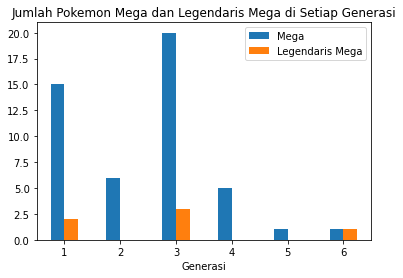

In [56]:
# diagram batang pokemon mega dan legendaris di setiap generasi
pd.concat([
    mega_form.groupby('generation').count()['id_number'], # jumlah pokemon mega di setiap generasi
    mega_form.groupby('generation').sum()['legendary']], # jumlah pokemon legendaris mega di setiap generasi
    axis = 1)\
.plot.bar(stacked=False, xlabel='Generasi', rot=0, title='Jumlah Pokemon Mega dan Legendaris Mega di Setiap Generasi')\
.legend(['Mega', 'Legendaris Mega']) # custom legend

#### Forms
Beberapa Pokemon memiliki variasi besar antar individu pokemon, yang dikenal sebagai _forms_. Semua variasi ini memiliki penampilan yang berbeda dan dikenali oleh Pokédex. Beberapa Pokémon dengan perbedaan bentuk dapat berubah di antara bentuknya (misal, Castform), sementara yang lain bersifat tetap dan tidak dapat diubah (misal, Unown).  
Sumber: https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_with_form_differences

In [57]:
# form lain selain mega
other_form = dup_data[~(dup_data['name'].str.contains('Mega'))]
print(f'Dalam data, ada {len(other_form)} bentuk pokemon hingga generasi ke 6 selain dari pokemon mega.')
other_form

Dalam data, ada 31 bentuk pokemon hingga generasi ke 6 selain dari pokemon mega.


,id_number,name,generation,legendary
422,382,KyogrePrimal Kyogre,3,True
424,383,GroudonPrimal Groudon,3,True
429,386,DeoxysAttack Forme,3,True
430,386,DeoxysDefense Forme,3,True
431,386,DeoxysSpeed Forme,3,True
459,413,WormadamSandy Cloak,4,False
460,413,WormadamTrash Cloak,4,False
532,479,RotomHeat Rotom,4,False
533,479,RotomWash Rotom,4,False
534,479,RotomFrost Rotom,4,False


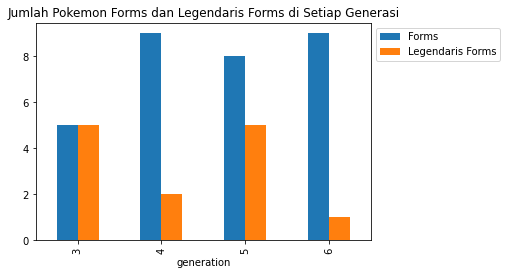

In [58]:
# diagram batang dari pokemon forms dan legendaris form di setiap generasi
pd.concat([
    other_form.groupby('generation').count()['id_number'], # jumlah pokemon forms di setiap generasi
    other_form.groupby('generation').sum()['legendary']], # jumlah pokemon legendaris forms di setiap generasi
    axis = 1)\
.plot.bar(stacked=False, title='Jumlah Pokemon Forms dan Legendaris Forms di Setiap Generasi')\
.legend(['Forms', 'Legendaris Forms'], bbox_to_anchor=(1.0, 1.0)) # kustomisasi legenda diagram batang

### 2. Pokemon apa yang terkuat berdasarkan total status?

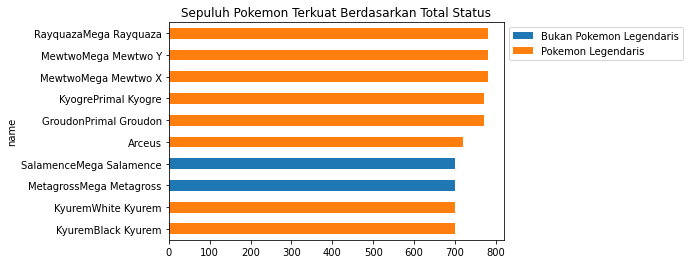

In [59]:
# memilih kolom yang dibutuhkan dan mengurutkan berdasarkan total status
# kemudian memilih 10 besar
gr_legend = pokedex[['name', 'total', 'legendary']].sort_values('total', ascending=False)[:10]

# Diagram batang 10 pokemon terkuat berdasarkan total status
gr_legend = gr_legend.pivot_table(index=['name'], columns=['legendary'], values=['total'])
gr_legend.fillna(0, inplace=True)
gr_legend['sum'] = gr_legend['total'][False] + gr_legend['total'][True]
gr_legend.sort_values('sum').drop('sum', axis=1).plot.barh(
    stacked=True,
    ylabel='Nama Pokemon',
    title='Sepuluh Pokemon Terkuat Berdasarkan Total Status'
    ).legend(['Bukan Pokemon Legendaris', 'Pokemon Legendaris'], bbox_to_anchor=(1.0, 1.0)) # kustomisasi legenda diagram batang

Jika kita perhatikan berdasarkan total status, **sepuluh pokemon terkuat merupakan pokemon legendaris atau pokemon mega**. Bahkan, **tiga urutan teratas pokemon terkuat merupakan pokemon legendaris dalam bentuk pokemon mega**. Urutan ketiga dan keempat merupakan pokemon legendaris dalam forms (_primal form_). Pokemon legendaris adalah pokemon yang sangat langka dan kuat, serta biasanya berkaitan dengan legenda atau mitos dalam dunia pokemon<sup>1</sup>. Pokemon legendaris dalam forms (pokemon mega dan bentuk lainnya) menjadikannya lebih kuat lagi.

Sumber:  
<sup>1</sup> https://bulbapedia.bulbagarden.net/wiki/Legendary_Pok%C3%A9mon


**Selanjutnya, jika bukan pokemon legendaris dan pokemon bentuk lain, apa pokemon yang terkuat berdasarkan total statusnya?**

In [60]:
# hapus data pokemon legendaris dan forms
not_leg = pokedex.query('legendary == False') # bukan pokemon legendaris
not_legnform = not_leg[~not_leg['id_number'].duplicated()] # bukan pokemon forms
not_legnform = not_legnform.iloc[:,np.r_[1,4,11]] # hanya memilih kolom yang dibutuhkan
not_legnform.sort_values('total', ascending=False)[:15] # mengurutkan data dan memilih 15 besar

,name,total,generation
313,Slaking,670,3
267,Tyranitar,600,2
776,Goodra,600,6
412,Metagross,600,3
408,Salamence,600,3
546,Cresselia,600,4
548,Manaphy,600,4
493,Garchomp,600,4
161,Dragonite,600,1
717,Genesect,600,5


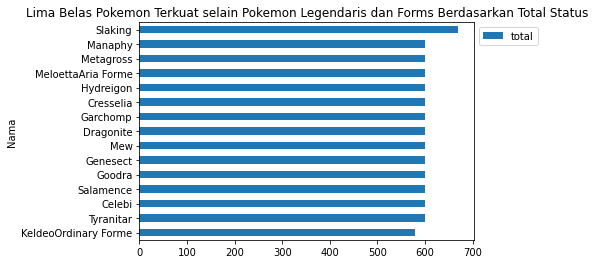

In [61]:
# mengurutkan untuk mengambil 15 pokemon terkuat selain dari pokemon legendaris dan forms berdasarkan total status
# mengurutkan secara terbalik agar saat membuat diagram batang horizontal, pokemon yang terkuat berada paling atas
gr_not_legnform = not_legnform.sort_values('total').tail(15) 

# memmbuat diagram batang horizontal
gr_not_legnform.plot.barh(
    x='name',
    xlabel='Nama',
    y='total',
    ylabel='Total',
    title='Lima Belas Pokemon Terkuat selain Pokemon Legendaris dan Forms Berdasarkan Total Status'
    ).legend(bbox_to_anchor=(1.0, 1.0)) # kustomisasi legenda diagram batang

Hingga generasi ke-6, pokemon terkuat yang bukan pokemon legendaris dan bentuk lainnya adalah **Slaking dengan total status 670**. Urutan di bawahnya, ada tiga belas pokemon memiliki masing-masing total status yang sama yaitu sebesar 600.

### 3. Pokemon apa yang memiliki nilai rendah di setiap statusnya?

In [62]:
# memilih kolom yang dibutuhkan
start = list(pokedex.columns[:5])
end = list(pokedex.columns[11:])

# daftar pokemon yang memiliki nilai rendah di setiap statusnya
for col in pokedex.columns[5:11]:
    # menyaring pokemon yang memiliki status < 5 di setiap status
    display(pokedex.loc[:, start + [col] + end].query(col + ' <= 5')\
            .style.set_caption(col.upper())) # membuat judul tabel
    print()

,id_number,name,type_1,type_2,total,hp,generation,legendary
316,292,Shedinja,Bug,Ghost,236,1,3,False


,id_number,name,type_1,type_2,total,attack,generation,legendary
121,113,Chansey,Normal,Normal,450,5,1,False
488,440,Happiny,Normal,Normal,220,5,4,False


,id_number,name,type_1,type_2,total,defense,generation,legendary
121,113,Chansey,Normal,Normal,450,5,1,False
488,440,Happiny,Normal,Normal,220,5,4,False


,id_number,name,type_1,type_2,total,sp_atk,generation,legendary


,id_number,name,type_1,type_2,total,sp_def,generation,legendary


,id_number,name,type_1,type_2,total,speed,generation,legendary
230,213,Shuckle,Bug,Rock,505,5,2,False
495,446,Munchlax,Normal,Normal,390,5,4,False


- Ternyata, ada pokemon yang memiliki 1 hp yaitu Shedinja. Shedinja adalah pokemon yang cukup aneh karena tubuhnya adalah cangkang kosong<sup>2</sup>. Mungkin, karena hal ini hp-nya hanya bernilai 1.
- Attack dan defense milik Happiny dan Chansey bernilai 5. Dalam serial kartun Pokemon, Chansey yang berkostum suster sering terlihat menemani Suster Joy di Pokemon Center, sedangkan Happiny adalah evolusi sebelum Chansey<sup>3</sup>. Mungkin, karena hal ini, Happiny dan Chansey sepertinya tidak diperuntukkan untuk bertarung. Meskipun, di beberapa episode serialnya, Chansey pernah terlihat digunakan dalam pertarungan antar pokemon.
- Shuckle dan Munchlax hanya memiliki nilai speed 5. Munchlax secara biologi adalah pokemon yang bergerak sangat lambat.<sup>4</sup>.

source:  
<sup>2</sup> https://bulbapedia.bulbagarden.net/wiki/Shedinja_(Pok%C3%A9mon)  
<sup>3</sup> https://bulbapedia.bulbagarden.net/wiki/Nurse_Joy%27s_Chansey  
<sup>4</sup> https://bulbapedia.bulbagarden.net/wiki/Munchlax_(Pok%C3%A9mon)#Biology

### 4. Pokemon apa yang memiliki forms terbanyak dan bagaimana perbedaan antar status di setiap bentuknya?

In [63]:
# menghitung jumlah pokemon forms dari yang dimiliki setiap pokemon
count_form = pokedex.id_number.value_counts()
print(count_form, end='\n\n')

# menyaring pokemon yang memiliki pokemon forms lebih dari 3,
# lalu mendapatkan id_number pokemon tersebut yang mana itu adalah indexnya
most_form_id = list(count_form[count_form > 3].index)
print('Nomor ID pokemon yang memilki forms lebih dari 3:', most_form_id)

479    6
386    4
710    4
711    4
646    3
      ..
250    1
251    1
252    1
253    1
721    1
Name: id_number, Length: 721, dtype: int64

Nomor ID pokemon yang memilki forms lebih dari 3: [479, 386, 710, 711]


In [64]:
# daftar pokemon yang memiliki lebih dari 3 forms dan pokemon forms-nya
most_form = pokedex.query('id_number in @most_form_id').iloc[:,np.r_[:11]] # memilih kolom yang kita butuhkan saja
most_form

,id_number,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed
428,386,DeoxysNormal Forme,Psychic,Psychic,600,50,150,50,150,50,150
429,386,DeoxysAttack Forme,Psychic,Psychic,600,50,180,20,180,20,150
430,386,DeoxysDefense Forme,Psychic,Psychic,600,50,70,160,70,160,90
431,386,DeoxysSpeed Forme,Psychic,Psychic,600,50,95,90,95,90,180
531,479,Rotom,Electric,Ghost,440,50,50,77,95,77,91
532,479,RotomHeat Rotom,Electric,Fire,520,50,65,107,105,107,86
533,479,RotomWash Rotom,Electric,Water,520,50,65,107,105,107,86
534,479,RotomFrost Rotom,Electric,Ice,520,50,65,107,105,107,86
535,479,RotomFan Rotom,Electric,Flying,520,50,65,107,105,107,86
536,479,RotomMow Rotom,Electric,Grass,520,50,65,107,105,107,86


Terdapat 4 pokemon yang memiliki lebih dari 3 bentuk, yaitu Rotom, Deoxys, Pumpkaboo, dan Gourgeist.

<AxesSubplot:title={'center':'ID Number = 479'}>

<AxesSubplot:title={'center':'ID Number = 386'}>

<AxesSubplot:title={'center':'ID Number = 710'}>

<AxesSubplot:title={'center':'ID Number = 711'}>

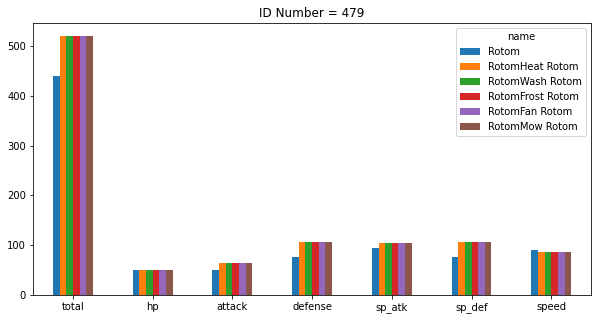

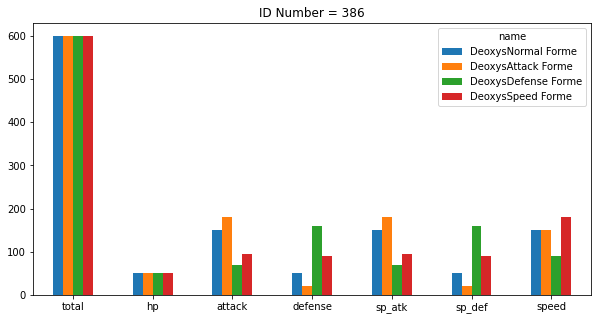

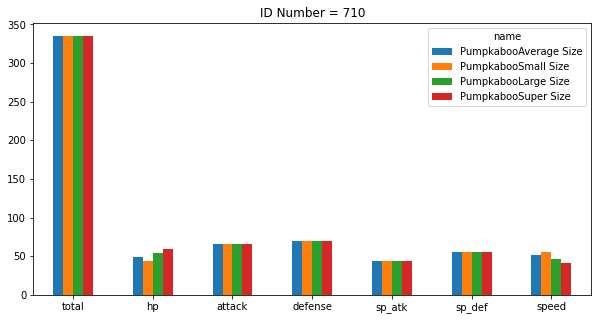

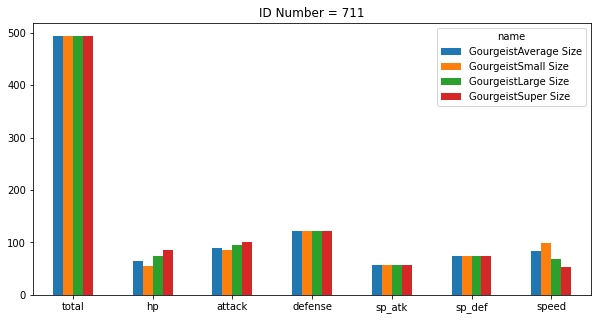

In [65]:
# Diagram batang dari masing-masing pokemon yang memiliki forms lebih dari 3
for idn in most_form_id:
    display(most_form.query('id_number == @idn')\
            .drop(['id_number', 'type_1', 'type_2'], axis=1)\
            .set_index('name')\
            .transpose()\
            .plot.bar(stacked=False, rot=0, title='ID Number = ' + str(idn), figsize=(10,5)))

Jika kita perhatikan pada diagram batang di atas, ada banyak hal menarik yang dapat kita temukan:
- **Rotom**
    - Forms dari Rotom ialah perubahan bentuk menyerupai berbagai peralatan elektronik. Perubahan bentuknya ini membuat tipe dan statusnya juga ikut berubah<sup>5</sup>. Forms Rotom membuat setiap statusnya meningkat kecuali _hp_ yang tidak berubah dan _speed_ yang menurun. Bahkan total statusnya meningkat. Jika dibandingkan di antara semua Forms Rotom, mereka semua memiliki poin status yang sama.
- **Deoxys**
    - Masing-masing Forms Deoxys memiliki peningkatan drastis beberapa statusnya, tetapi total status tetap sama. Sehingga ada beberapa statusnya yang lain menurun.
    - Pada Deoxys Attack Forme, _attack_ dan _sp. attack_ lebih tinggi dibanding Deoxys Normal, tetapi _defense_ dan _sp. defense_ lebih rendah dan _speed_ tetap sama.
    - Pada Deoxys Defense Forme, _defense_ dan _sp. defense_ lebih tinggi dibanding Deoxys Normal, tetapi _attack_, _sp. attack_, dan _speed_ lebih rendah.
    - Pada DeoxysSpeed Forme, _defense_ dan _sp. defense_ lebih tinggi dibanding Deoxys Normal, tetapi lebih rendah dibanding Deoxys Defense Forme. _Attack_ dan _sp. attack_ lebih rendah dibanding Deoxys Normal, tetapi lebih tinggi dibanding Deoxys Defense Forme. _Speed_ lebih tinggi dibanding Deoxys Normal dan bentuk Deoxys lainnya.
- **Pumpkaboo dan Gourgeist**
    - Gourgeist adalah pokemon evolusi dari Pumpkaboo, sehingga jenis formsnya juga sama. Secara visual, Forms mereka memiliki perbedaan pada ukuran tubuh, yaitu mulai dari ukuran kecil sampai super (_small_, _average_, _large_, dan _super_)<sup>6</sup>. Perbedaan ukuran atau di antara forms ini juga terdapat perbedaan pada beberapa statusnya, tetapi total status tetap sama.
        - Pada Pumpkaboo, semakin besar ukurannya semakin besar pula _hp_-nya, tetapi semakin kecil _speed_-nya.
        - Pada Gourgeist, semakin besar ukurannya semakin besar _hp_ dan _attack_-nya, , tetapi semakin kecil _speed_-nya.

Sumber:  
<sup>5</sup> https://bulbapedia.bulbagarden.net/wiki/Rotom_(Pok%C3%A9mon)  
<sup>6</sup> https://bulbapedia.bulbagarden.net/wiki/Gourgeist_(Pok%C3%A9mon)

## VI. Kesimpulan

- Ada beberapa pokemon yang memiliki bentuk lain selain dari bentuk orisinilnya yang disebut forms. Forms memiliki berbagai jenis, salah satunya disebut Pokemon Mega. Pokemon mega dapat diidentifikiasi dari namanya yang diawali kata 'Mega'. Hingga generasi ke-6, terdapat 48 pokemon mega dan 31 pokemon forms selain pokemon mega.

- Sepuluh pokemon terkuat adalah pokemon legendaris atau pokemon mega. Bahkan tiga urutan teratas adalah pokemon legendaris dalam bentuk pokemon mega. Urutan keempat dan kelima adalah pokemon legendaris berwujud _primal forms_. Pokemon legendaris dikenal sangat langka dan kuat di antara pokemon lainnya. Pokemon legendaris berwujud forms menjadikannya lebih kuat lagi.
Jika bukan pokemon legenda atau pokemon forms, pokemon yang terkuat adalah Slaking dengan total status 600.

- Shedinja adalah pokemon yang memiliki _hp_ hanya bernilai 1. Happiny dan Chansey adalah pokemon yang memiliki _attack_ dan _defense_ hanya bernilai 5. Shuckle dan Munchlax hanya memiliki nilai _speed_ 5.

- Terdapat 4 pokemon yang memiliki lebih dari 3 forms, yaitu Rotom, Deoxys, Pumpkaboo, dan Gourgeist. Pokemon forms dari masing-masing pokemon tersebut memiliki beberapa perbedaan dari beberapa statusnya dibanding pokemon orisinilnya, tetapi total statusnya tetap sama kecuali Rotom.